In [6]:
#imports
import numpy as np
import pandas as pd
import seaborn as sns; sns.set() # just makes your plots look prettier run 'pip install seaborn'
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score as accuracy
from keras.models import Sequential
from keras.layers.core import Dense
from IPython.core.pylabtools import figsize
figsize(15, 7)

# PART 1
In the first part of the homework you will be redoing the example from class now using a weight $\theta_1$ and a bias $\theta_0$

In lecture we only considered the case of: $\hat{y} = \theta_1 x$  
We will now be adding a bias term so our predictions are of the form: $\hat{y} = \theta_1 x + \theta_0$

This is no different from what you did in kindergarten when you played with $y = mx + b$ 

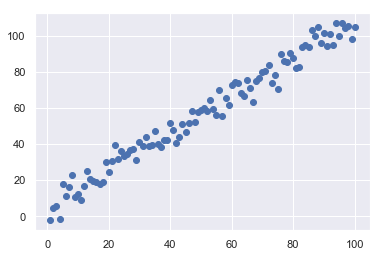

In [3]:
noise = np.random.randn(100)

x = np.arange(1,101) 
y = x + 5*noise + np.random.randn()*10

plt.scatter(x, y); plt.show()

# 1.1 Train test split (1 point)

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((70,), (30,), (70,), (30,))

# 1.2 Plot (1 point)
* Make a scatter plot coloring the train points and testing points on the same graph

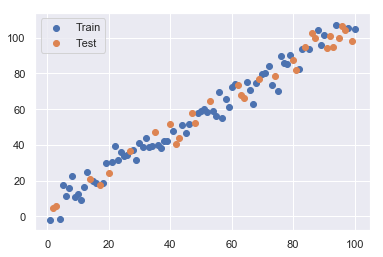

In [5]:
plt.scatter(x_train,y_train, label='Train')
plt.scatter(x_test,y_test, label='Test')
plt.legend(); plt.plot(); None

# 1.3 Learning (10 point)
* Iteratively update $\theta_1$ and $\theta_0$
* You will have to work out the derivative of the cost, $J(\theta)$, with respect to the bias, $\theta_0$

In [23]:
# starting initializations for weights
theta_1 = 0.1
theta_0 = 0.0

y_train_hat_1 = x_train * theta_1

J_theta_1 = theta_0 + (np.square(y_train - y_train_hat_1))/2

save_theta_0 = [theta_0]
save_theta_1 = [theta_1]
J_1          = [np.sum(J_theta_1)]
for i in range(7):
    grad_theta_1 = (y_train - y_train_hat_1) * x_train
    update_1     = -1/float(len(x_train)) * np.sum(grad_theta_1)
    theta_0      = theta_0 - 0.00005 * update_0
    theta_1      = theta_1 - 0.0001 * update_1
    
    J_1.append(theta_0 + 0.5*np.sum((y_train - theta_1 * x_train)**2))
    save_theta_0.append(theta_0)
    save_theta_1.append(theta_1)

# 1.4 Plots (2 points)
* Just like lecture plot the cost over time (this should decrease over time)
* Predicted line (this should move closer to the data)

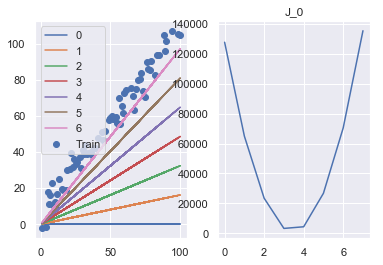

In [24]:
plt.subplot(1,2,1)
plt.scatter(x_train, y_train, label='Train')

for i in range(7):
    plt.plot(x_train, save_theta_0[i] * x_train, label=i)
plt.legend()

plt.subplot(1,2,2)
plt.plot(J_0); plt.title('J_0')
plt.show()


# 1.5 Conceptual (1 point)
**Q:** What does adding a bias allow us to do that we can't without it?  
**A:** Adding bias allows for a greater control of the perceptron layer(s). It allows for another constant weight that is used to better control the accuracy of the model between layers. Without the bias, we have to rely completely on each weight which can overshoot or undershoot the correct line. A bias a consistent constant

# PART 2 
---
# 2.1 Load MNIST (1 point)

In [22]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2.2 Display an Image (1 point)
* Display an image of a **5**

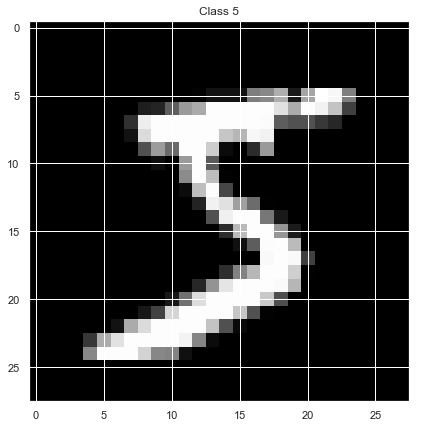

In [23]:
plt.imshow(x_train[0], cmap='gray', interpolation='none')
plt.title("Class 5".format(y_train[0]))
plt.show()

# 2.3 Preprocessing (3 points)

In [24]:
num_classes = 10
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32').reshape(-1,784)
x_test = x_test.astype('float32').reshape(-1,784)

x_train /= 255.; x_test /= 255.

# 2.4 Hyperparameter Optimization (10 points)

Here you will perform a rudimentary hyperparameter optimization search. Aka try a bunch of different networks and see which one performs the best. 

Build networks with the following: 
* At least 3 activation functions
* At least 5 learning rates
* At least 3 layer depths
* Loss function: categorical_crossentropy
* Monitor loss, val_loss, acc, and val_acc during training

Up to you:
* How many nodes in each layer
* How many epochs

**Hints**
* Do not manually create 45 different networks...
* Build some type of storage table to keep track of your results (i.e. pandas dataframe)

In [31]:
model_storage = []

def build_network(lr, num_layers, activation_function):
    model = Sequential()
    if(num_layers == 1):
        model.add(Dense(10, activation=activation_function,input_shape=(784,)))
    elif(num_layers == 2):
        model.add(Dense(256, activation=activation_function,input_shape=(784,)))
        model.add(Dense(10, activation=activation_function))
    else:
        model.add(Dense(256, activation=activation_function,input_shape=(784,)))
        model.add(Dense(256, activation=activation_function))
        model.add(Dense(10, activation=activation_function))

    model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])
    
    history =  model.fit(x_train, y_train,batch_size=32,epochs=5,verbose=1,validation_data=(x_test, y_test))
    model_storage.append(history.history)

In [32]:
# run
for i in range(5):
    for k in range(3):
        build_network(i, k, 'relu')
        
for i in range(5):
    for k in range(3):
        build_network(i, k, 'softmax')
        
for i in range(5):
    for k in range(3):
        build_network(i, k, 'sigmoid')

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 8s 126us/step - loss: nan - acc: 0.1299 - val_loss: nan - val_acc: 0.0980
Epoch 2/5
60000/60000 [==============================] - 7s 115us/step - loss: nan - acc: 0.0987 - val_loss: nan - val_acc: 0.0980
Epoch 3/5
60000/60000 [==============================] - 7s 115us/step - loss: nan - acc: 0.0987 - val_loss: nan - val_acc: 0.0980
Epoch 4/5
60000/60000 [==============================] - 7s 117us/step - loss: nan - acc: 0.0987 - val_loss: nan - val_acc: 0.0980
Epoch 5/5
60000/60000 [==============================] - 7s 118us/step - loss: nan - acc: 0.0987 - val_loss: nan - val_acc: 0.0980
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 38us/step - loss: nan - acc: 0.0987 - val_loss: nan - val_acc: 0.0980
Epoch 2/5
60000/60000 [==============================] - 2s 31us/step - loss: nan - acc: 0.0987 - val_loss: nan - v

# 2.5 Results (5 points)
* Report the best network configuration you find (evaluate on validation accuracy)
* Plot the best train loss, train accuracy, test loss and test accuracy

In [ ]:
relu_storage = []
soft_storage = []
sig_storage = []

for i in range(15):
    relu_storage.append(model_storage[i])

for i in range(15, 30, 1):
    soft_storage.append(model_storage[i])

for i in range(30, 45, 1):
    sig_storage.append(model_storage[i])
    
max_relu = max(relu_storage)
max_relu_index = relu_storage.index(max_relu)
max_soft = max(soft_storage)
max_soft_index = soft_storage.index(max_soft)
max_sig = max(sig_storage)
max_sig_index = sig_storage.index(max_sig)

max_value = max(max_relu, max_soft, max_sig)
if(max_value == max_relu):
    history_2 = model_storage[max_relu_index]
if(max_value == max_soft):
    history_2 = model_storage[max_soft_index + 15]
if(max_value == max_sig):
    history_2 = model_storage[max_sig_index + 30]
    
val_loss = history_2.history['val_loss']
val_acc = history_2.history['val_acc']
acc = history_2.history['acc']

plt.subplot(1,3,1)
plt.plot(val_loss)
plt.title("Val Loss")
plt.show

plt.subplot(2,3, 1)
plt.plot(val_acc)
plt.title("Val Acc")
plt.show

plt.subplot(3,3,1)
plt.plot(acc)
plt.title("Acc")
plt.show

# PART 3
---
# 3.1 CIFAR (10 points)
* Train a network on the CIFAR datasets

In [ ]:
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.optimizers import SGD

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255.; x_test /= 255.

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(lr=0.001, momentum=0.9)

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

history = model.fit(x_train, y_train,batch_size=64,epochs=100,verbose=0,validation_data=(x_test, y_test))

acc = model.evaluate(x_test, y_test, verbose=0)

# 3.2 Results (5 points)
Report your results with accuracy plots 

In [ ]:
from matplotlib import pyplot

pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['acc'], color='blue', label='train')
pyplot.plot(history.history['val_acc'], color='orange', label='test')

# Extra Credit (12 points)
---
# E.1 Things to think about (2 points)
* What happens when we try and use different losses on these classification tasks?
* Why do we have to use the `to_categorical` function?
    * What does this do to the labels?
* How does CIFAR differ from MNIST?
    * How does this change the network?

**A:**

# E.2 Ploynomial Regression

Instead of performing standard linear regression like we did above (equation 1 below).  
You will now do polynomial regression. All that means is we will add an extra weight $\theta_2$ to the $x^2$ term. 

1. $\hat{y} = \theta_1 x + \theta_0$
2. $\hat{y} = \theta_2 x^2 + \theta_1 x + \theta_0$

I'd recommend first working out the derivatives by hand for learning.   
Don't be intimidated by the terms.  
Make it simple, what is the derivative of $x^2$?

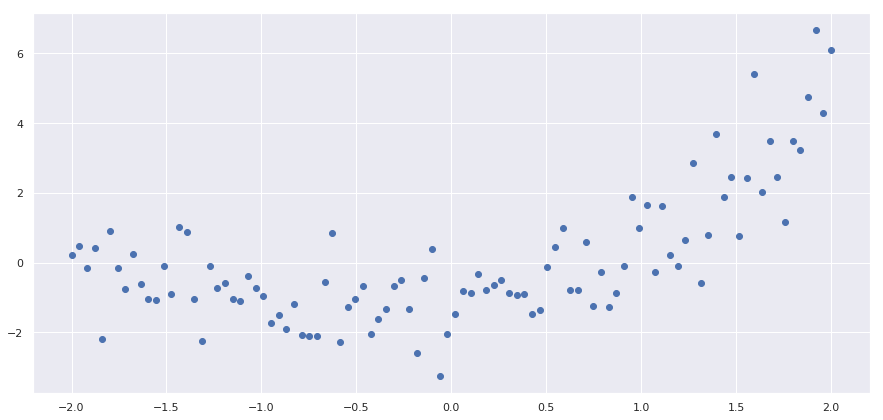

In [21]:
noise = np.random.randn(100)

x = np.linspace(-2,2, 100)
y = x + noise + np.random.randn()*2 + x**2

plt.scatter(x, y); plt.show()

# E.3 (1 point)
**Q:** what does the extra weight $\theta_2$ allow us to do? (**Hint:** it has to do with the $x^2$ term)  
**A:** The extra term ($\theta_2$) allows for control over the next term in the polynomial. A linear function only has one (maybe two with a bias) weights because it it only has one variable value that needs a coeffiecient. But a polynomial needs another term because it has another variable that needs a coefficient or weight.

# E.4 Learning (7 points)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

# E.5 Plots (2 points)
* same as above

In [ ]:
plt.plot(x, y_poly_pred, color='m')
plt.show()